## Data Loading and Setup

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset (adjust path to your specific file location in Drive)
file_path = '/content/drive/MyDrive/medical_students_dataset.csv'  # update with your file path
df = pd.read_csv(file_path)

##  Initial Data Inspection

In [4]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


In [5]:
# Basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None


In [6]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          Student ID            Age         Height         Weight  \
count  180000.000000  180000.000000  180000.000000  180000.000000   
mean    49974.042078      26.021561     174.947103      69.971585   
std     28879.641657       4.890528      14.447560      17.322574   
min         1.000000      18.000000     150.000041      40.000578   
25%     24971.750000      22.000000     162.476110      54.969838   
50%     49943.500000      26.000000     174.899914      69.979384   
75%     74986.000000      30.000000     187.464417      84.980097   
max    100000.000000      34.000000     199.998639      99.999907   

                 BMI    Temperature     Heart Rate  Blood Pressure  \
count  180000.000000  180000.000000  180000.000000   180000.000000   
mean       23.338869      98.600948      79.503767      114.558033   
std         7.033554       0.500530      11.540755       14.403353   
min        10.074837      96.397835      60.000000       90.000000   
25%

##Missing Value Imputation

In [7]:
# Checking for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [8]:
# Fill missing values based on data types
# Filling missing values for numerical columns with mean
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Filling missing values for categorical columns with mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Confirm the missing values are filled
print("\nMissing Values after Filling:")
print(df.isnull().sum())

<ipython-input-8-f80bec3ffeae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-8-f80bec3ffeae>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


Missing Values after Filling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [9]:
# Basic information about the dataset after filling missing value
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      200000 non-null  float64
 1   Age             200000 non-null  float64
 2   Gender          200000 non-null  object 
 3   Height          200000 non-null  float64
 4   Weight          200000 non-null  float64
 5   Blood Type      200000 non-null  object 
 6   BMI             200000 non-null  float64
 7   Temperature     200000 non-null  float64
 8   Heart Rate      200000 non-null  float64
 9   Blood Pressure  200000 non-null  float64
 10  Cholesterol     200000 non-null  float64
 11  Diabetes        200000 non-null  object 
 12  Smoking         200000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None


## Exploring Categories and Distributions

In [22]:
# Define categorical and numerical columns
categorical_columns=['Gender','Blood Type']
for col in categorical_columns:
  print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Gender: ['Female' 'Male']
Unique values in Blood Type: ['O' 'B' 'A' 'AB']


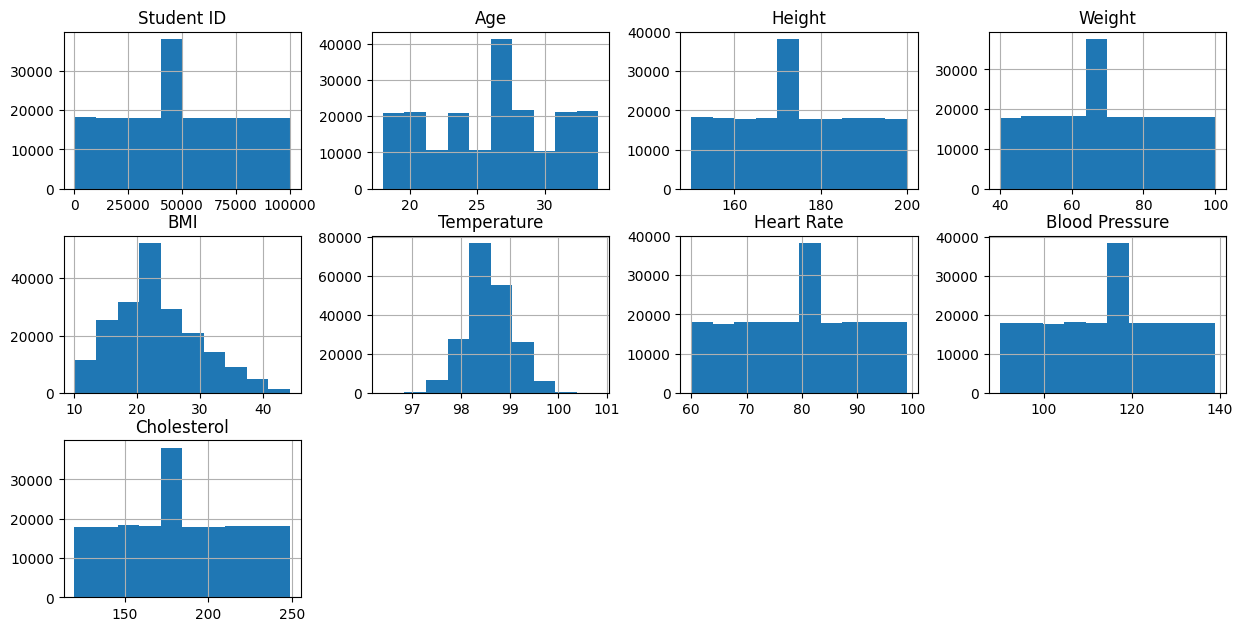

In [25]:
# Define numerical columns
numerical_columns= df.select_dtypes(include=['float64', 'int64']).columns
# Plot histograms for numerical columns
df[numerical_columns].hist(figsize=(15, 10), layout=(4,4))
plt.show()

## Visualization of distributions

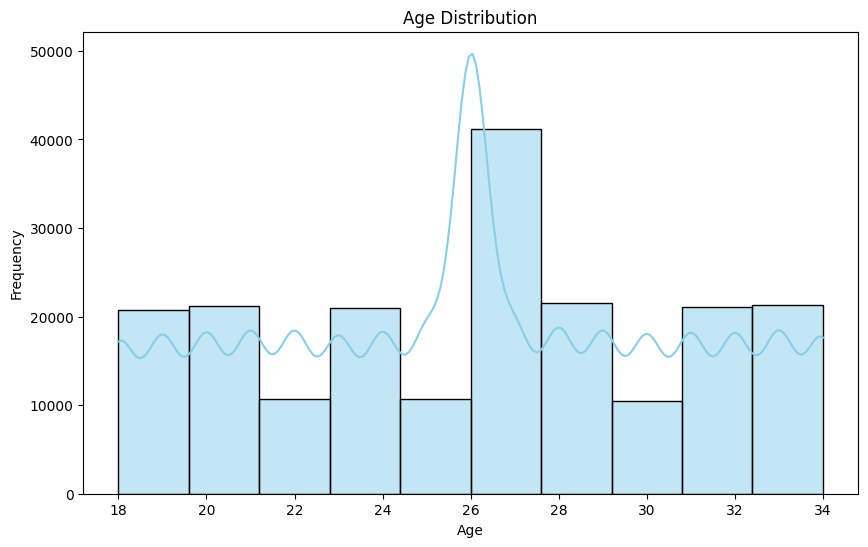

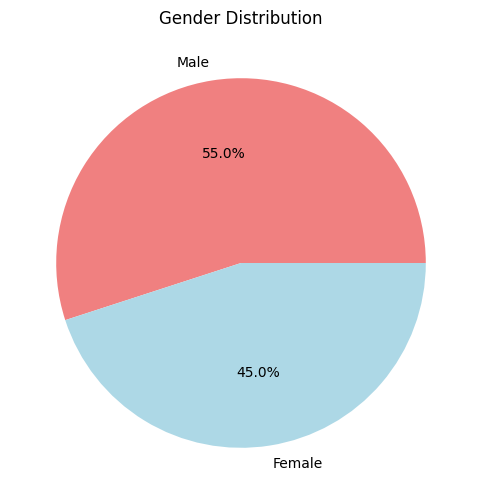

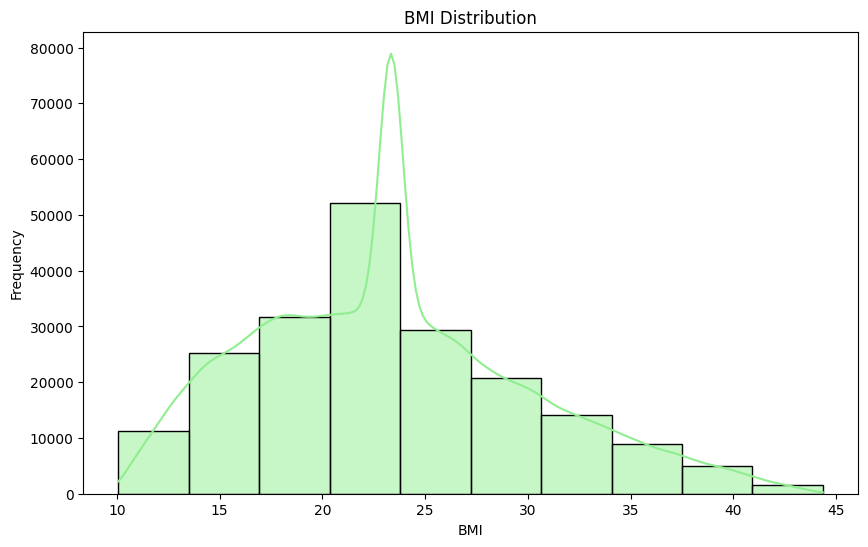

In [26]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], title='Gender Distribution')
plt.ylabel('')
plt.show()

# BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=10, kde=True, color='lightgreen')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

## Relationship Analysis Between Variables

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


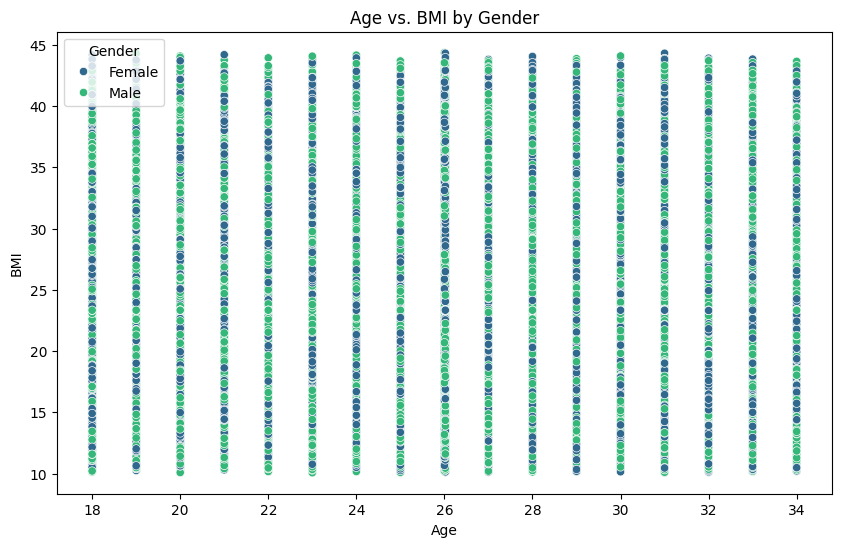

In [15]:
# Relationship between Age and BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Gender', palette='viridis')
plt.title('Age vs. BMI by Gender')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


## Correlation Analysis

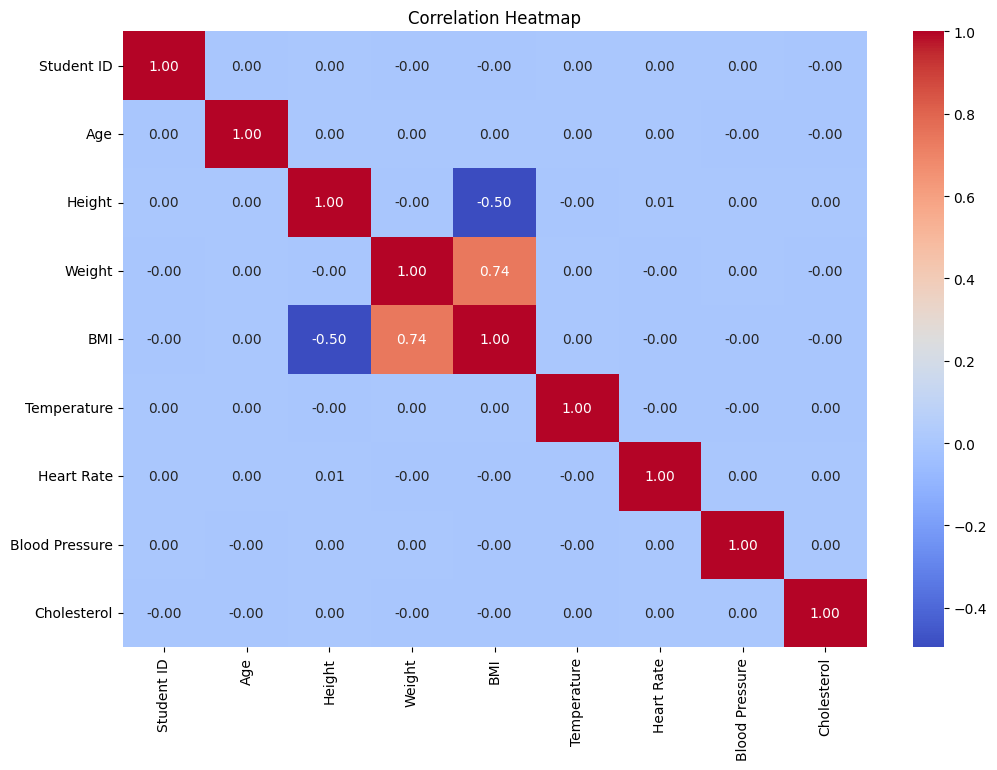

In [16]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##  Outlier Analysis with Box Plots

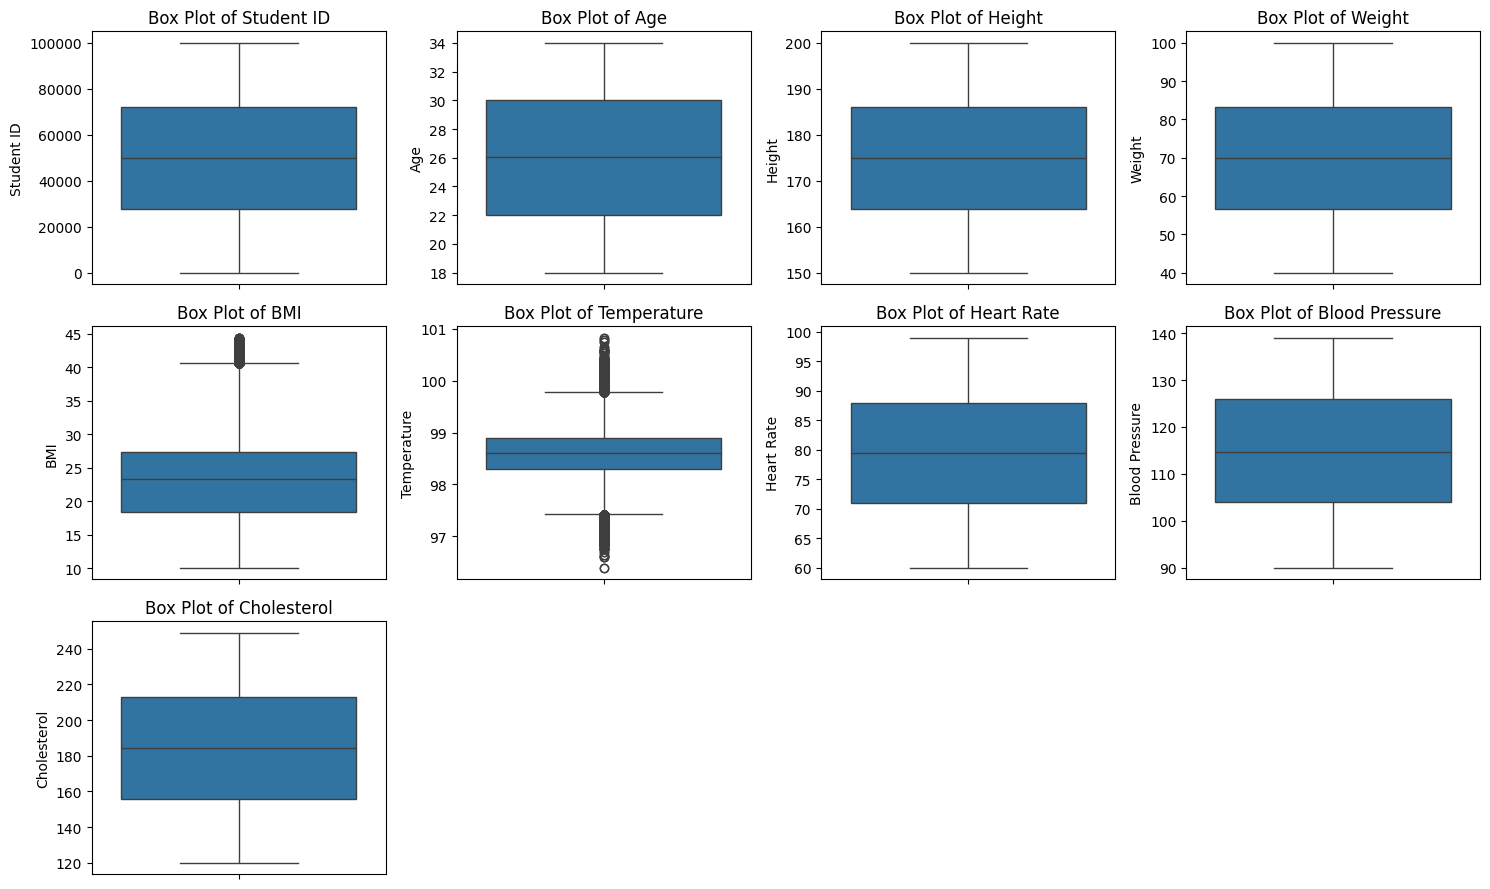

In [20]:
# Box plots to check for outliers in numeric columns
# Calculate number of rows and columns for subplots based on number of numeric columns
num_plots = len(numerical_columns)
num_cols = 4  # Set the number of columns you want in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, num_rows * 3))  # Adjust the figure size based on the number of rows

# Loop through each numeric column and plot box plots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()